In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [2]:
np.random.seed(17)

# Triagonal matrices

![matrix](http://i.huffpost.com/gen/4393678/images/n-THE-MATRIX-628x314.jpg)

In [3]:
def generate_random_triagonal(n):
    A = np.zeros((n, n))
    for i in range(n - 1):
        A[i + 1][i] = rand()
        A[i][i + 1] = rand()
        A[i][i] = rand()
    A[n - 1][n - 1] = rand()
    return A, rand(n)

In [4]:
def norm(A, x, f):
    return np.linalg.norm(A.dot(x) - f)

In [5]:
def run(method, A, f, verbose=False):
    if not verbose:
        print("-" * 100)
        print(method.__name__.upper())
    x = method(A, f)
    score = norm(A, x, f)
    if not verbose:
        print("x =", x)
        print("score =", score)
    return score

In [6]:
def linalg(A, f):
    return np.linalg.solve(A, f)

In [7]:
def right(A, f):    
    n = A.shape[0]
    a = np.zeros(n - 1)
    b = np.zeros(n - 1)
    a[0] = -A[0][1] / A[0][0]
    b[0] = f[0] / A[0][0]
    for i in range(1, n - 1):
        a[i] = -A[i][i + 1] / (A[i][i - 1] * a[i - 1] + A[i][i])
        b[i] = (f[i] - A[i][i - 1] * b[i - 1]) / (A[i][i - 1] * a[i - 1] + A[i][i])
    x = np.zeros(n)
    x[n - 1] = (f[n - 1] - A[n - 1][n - 2] * b[n - 2]) / (A[n - 1][n - 2] * a[n - 2] + A[n - 1][n - 1])
    for i in range(n - 2, -1, -1):
        x[i] = x[i + 1] * a[i] + b[i]
    return x

In [8]:
def left(A, f):    
    n = A.shape[0]
    a = np.zeros(n)
    b = np.zeros(n)
    a[n - 1] = -A[n - 1][n - 2] / A[n - 1][n - 1]
    b[n - 1] = f[n - 1] / A[n - 1][n - 1]
    for i in range(n - 2, 0, -1):
        a[i] = -A[i][i - 1] / (A[i][i + 1] * a[i + 1] + A[i][i])
        b[i] = (f[i] - A[i][i + 1] * b[i + 1]) / (A[i][i + 1] * a[i + 1] + A[i][i])
    x = np.zeros(n)
    x[0] = (f[0] - A[0][1] * b[1]) / (A[0][1] * a[1] + A[0][0])
    for i in range(1, n):
        x[i] = x[i - 1] * a[i] + b[i]
    return x

## 2x2 corner case

In [9]:
A = np.array(
    [[1, 2],
     [3, 4]]
)
f = np.array([5, 11])

_ = run(right, A, f)
_ = run(left, A, f)

----------------------------------------------------------------------------------------------------
RIGHT
x = [ 1.  2.]
score = 0.0
----------------------------------------------------------------------------------------------------
LEFT
x = [ 1.  2.]
score = 0.0


## Another example

In [10]:
A, f = generate_random_triagonal(6)
print(A)

_ = run(right, A, f)
_ = run(left, A, f)

[[ 0.19152079  0.53058676  0.          0.          0.          0.        ]
 [ 0.294665    0.65633352  0.78698546  0.          0.          0.        ]
 [ 0.          0.06790036  0.03906292  0.57560289  0.          0.        ]
 [ 0.          0.          0.6375209   0.06004468  0.94568319  0.        ]
 [ 0.          0.          0.          0.3578136   0.05119367  0.87729053]
 [ 0.          0.          0.          0.          0.8640421   0.65241862]]
----------------------------------------------------------------------------------------------------
RIGHT
x = [ 10.25298105  -2.66103067  -0.86044513   1.21233764   0.80232523
  -0.20191618]
score = 1.84109660315e-16
----------------------------------------------------------------------------------------------------
LEFT
x = [ 10.25298105  -2.66103067  -0.86044513   1.21233764   0.80232523
  -0.20191618]
score = 1.46868701149e-16


## Huge matrices

In [11]:
def timeit(method, A, f):
    start = time.process_time()
    method(A, f)
    return time.process_time() - start

In [12]:
A, f = generate_random_triagonal(5000)

%timeit run(right, A, f, verbose=True)
%timeit run(left, A, f, verbose=True)
%timeit run(linalg, A, f, verbose=True)

10 loops, best of 3: 40.5 ms per loop
10 loops, best of 3: 49.6 ms per loop
1 loop, best of 3: 1.31 s per loop


In [13]:
def plot_speed(method, sizes):
    scores = np.zeros_like(sizes, dtype=np.float)
    for i in range(len(sizes)):
        A, f = generate_random_triagonal(sizes[i])
        scores[i] = timeit(method, A, f)
    plt.plot(sizes, scores, label=method.__name__)

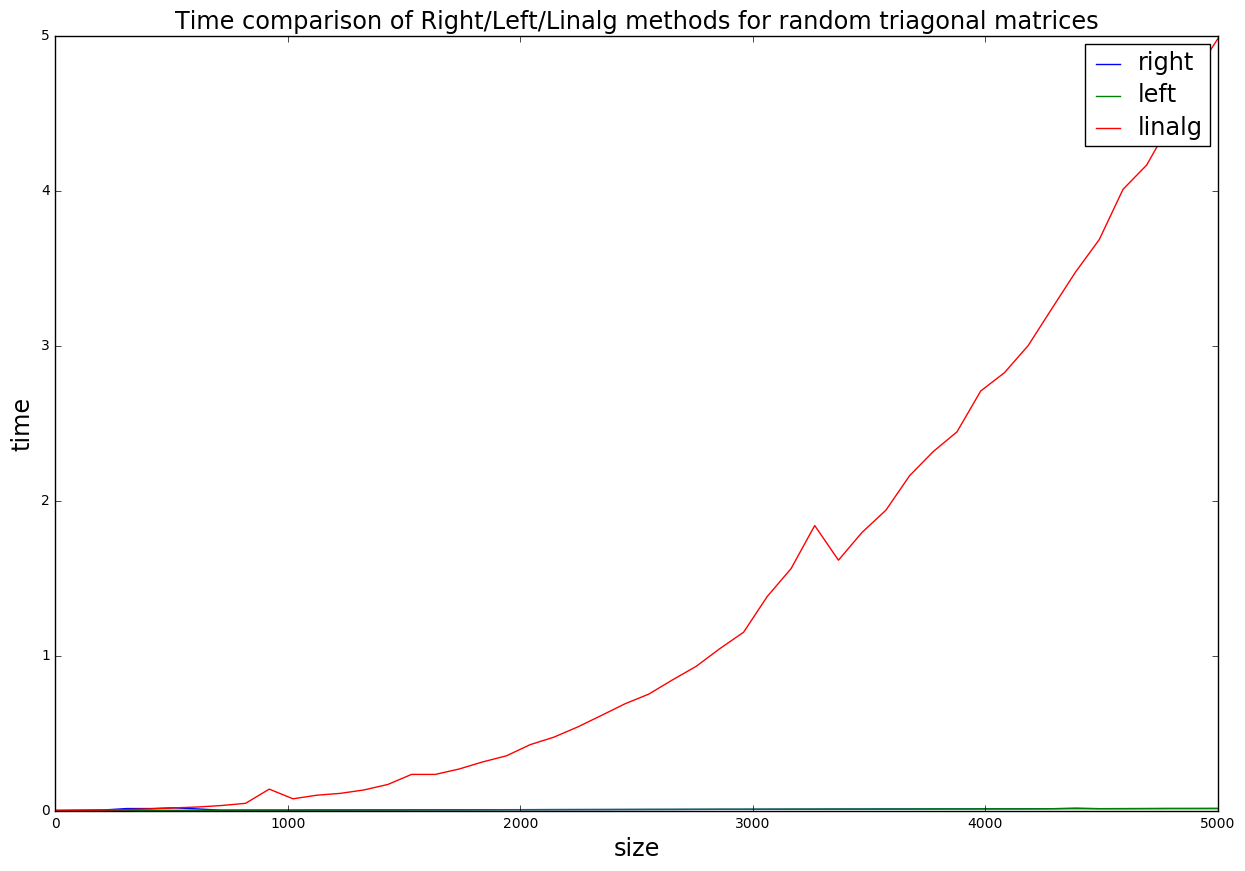

In [14]:
sizes = np.linspace(2, 5000, num=50, dtype=np.int)

plt.figure(figsize=(15, 10))
plot_speed(right, sizes)
plot_speed(left, sizes)
plot_speed(linalg, sizes)
plt.title("Time comparison of Right/Left/Linalg methods for random triagonal matrices").set_fontsize("xx-large")
plt.xlabel("size").set_fontsize("xx-large")
plt.ylabel("time").set_fontsize("xx-large")
# plt.xscale("log")
legend = plt.legend(loc="upper right")
for label in legend.get_texts():
    label.set_fontsize("xx-large")
plt.show()